In [11]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt
import seaborn as sns
%matplotlib inline



In [95]:
df = pd.read_csv("data/conversion_data.csv")

In [96]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


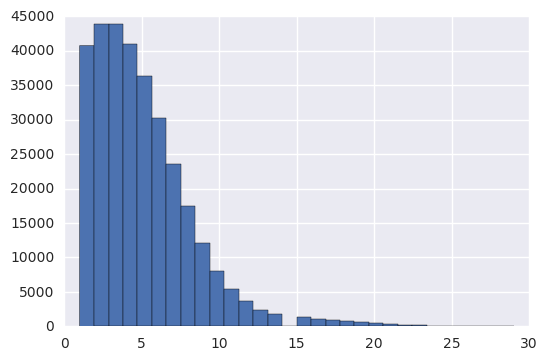

In [15]:
df.total_pages_visited.hist(bins=30)

In [8]:
df.new_user.value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [9]:
df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

Conversion rate is 3.26%

In [18]:
df.age.value_counts()

30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
Name: age, dtype: int64

In [107]:
df = df[df.age <67]

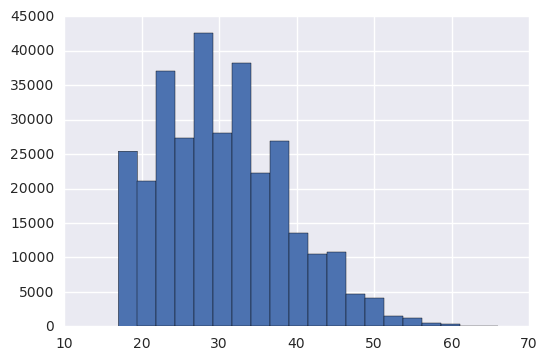

In [108]:
df.age.hist(bins=20)

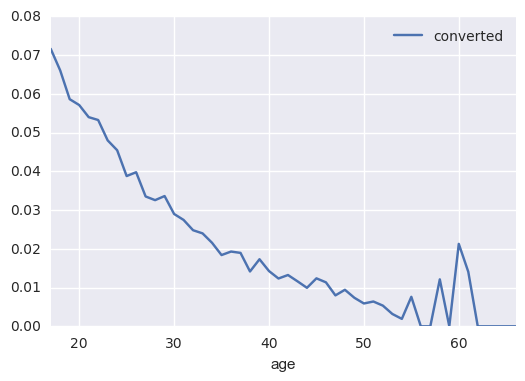

In [109]:
df.groupby('age').agg({'converted':'mean'}).plot(kind='line')

In [31]:
df.source.value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

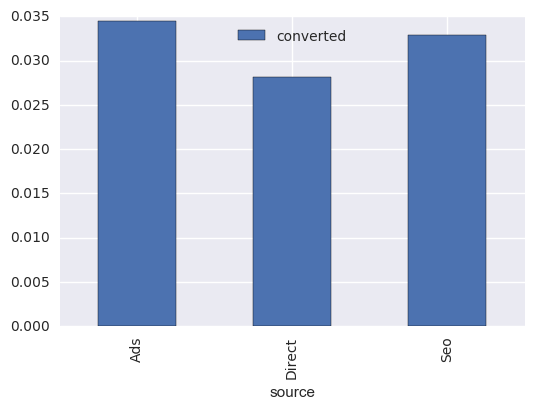

In [103]:
df.groupby('source').agg({'converted':'mean'}).plot(kind='bar')

In [32]:
df.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

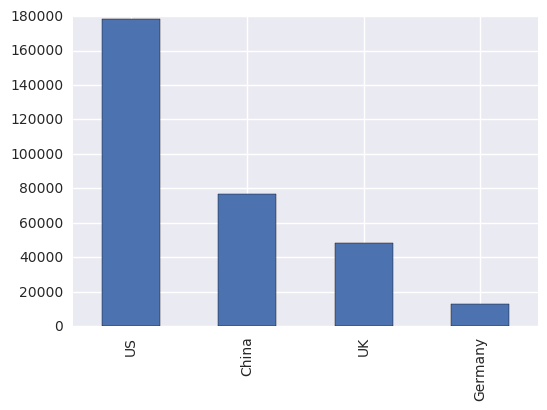

In [33]:
df.country.value_counts().plot(kind='bar')

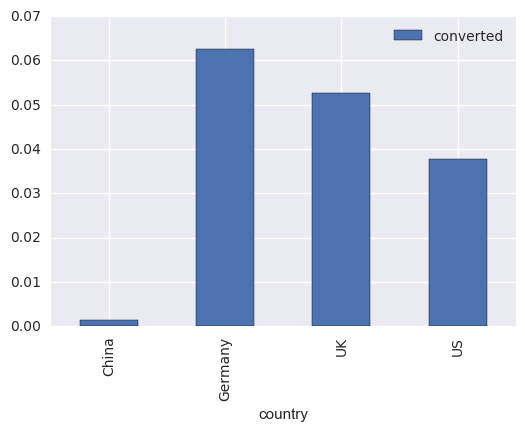

In [104]:
df.groupby('country').agg({'converted':'mean'}).plot(kind='bar')

In [110]:
df = pd.get_dummies(df, columns = ["country","source"])

In [111]:
df.head(1)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0


                          age  new_user  total_pages_visited  converted  \
age                  1.000000  0.012453            -0.046088  -0.089207   
new_user             0.012453  1.000000            -0.082533  -0.152343   
total_pages_visited -0.046088 -0.082533             1.000000   0.528980   
converted           -0.089207 -0.152343             0.528980   1.000000   
country_China        0.007154  0.015910            -0.054054  -0.098966   
country_Germany     -0.003116 -0.003656             0.019691   0.035444   
country_UK          -0.006110 -0.005142             0.026628   0.049023   
country_US          -0.000492 -0.008542             0.019456   0.035671   
source_Ads          -0.002667  0.000312             0.004950   0.007848   
source_Direct       -0.000126  0.001617            -0.009128  -0.012596   
source_Seo           0.002503 -0.001639             0.003224   0.003534   

                     country_China  country_Germany  country_UK  country_US  \
age                 

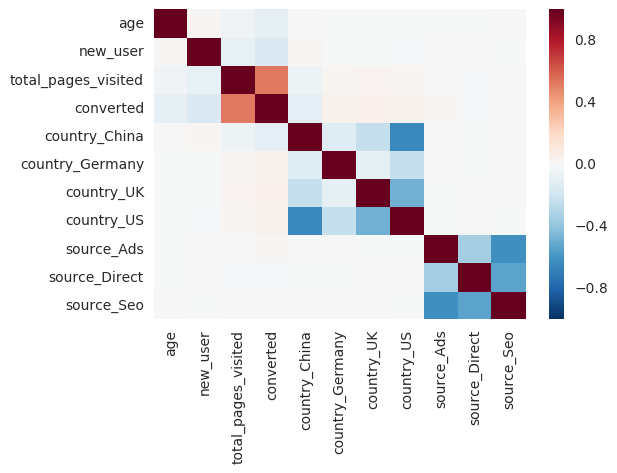

In [112]:

corr = df.corr()
print corr 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

the most important correlation is with total pages visited, but that's more like a 'natural' correlation, if you want to convert you have to visit more pages, or the more pages you visit the more inclined you get; in short, that's not really actionable. I'll remove this variable. 

Other 

In [113]:
df = df.drop('total_pages_visited',axis=1)

In [123]:
from sklearn.utils import shuffle
df = shuffle(df)
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop('converted',axis=1),df.converted,test_size=0.30, random_state=0)

In [124]:
Xtrain.head(1)

,age,new_user,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
63364,17,1,0,0,0,1,0,1,0


In [125]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100)
y_pred_gb = model_gb.fit(Xtrain, ytrain).predict(Xtest)
model_gb
#clf = RandomForestClassifier()
#clf.fit(Xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print classification_report(ytest,y_pred_gb)
print "roc auc:", roc_auc_score(ytest, y_pred_gb)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98     91782
          1       0.00      0.00      0.00      3072

avg / total       0.94      0.97      0.95     94854

roc auc: 0.5


In [127]:
features = pd.DataFrame([model_gb.feature_importances_ ], columns=Xtrain.columns,index=[1])

In [128]:
features.iloc[0].sort_values(ascending=False)

age                0.390536
new_user           0.214730
country_China      0.121959
country_Germany    0.068608
country_UK         0.058014
source_Direct      0.054503
country_US         0.046763
source_Ads         0.030852
source_Seo         0.014035
Name: 1, dtype: float64

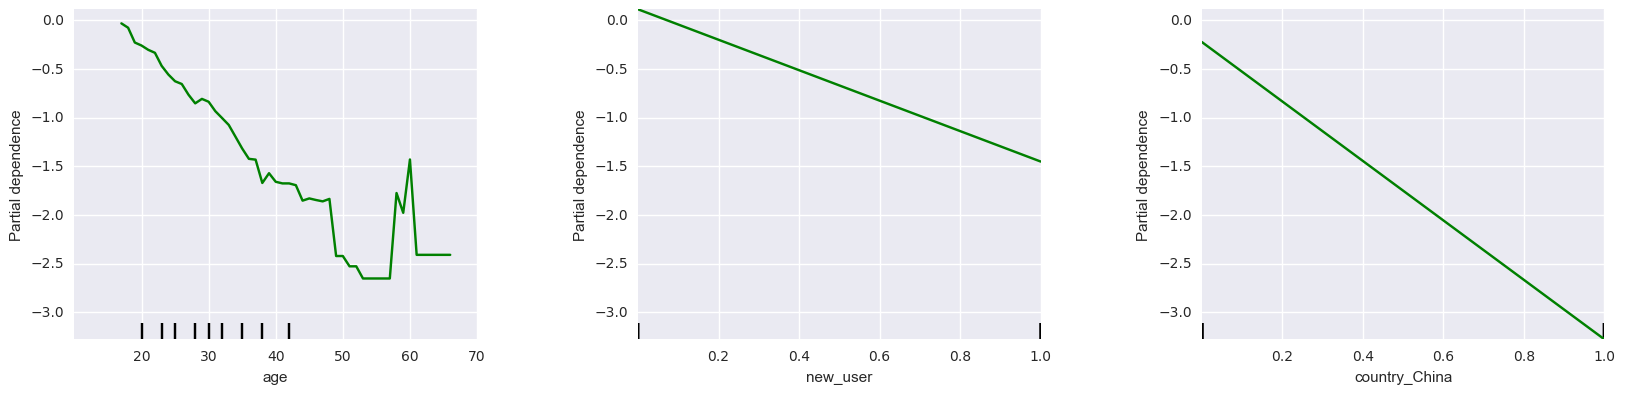

In [137]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence


fig, axs = plot_partial_dependence(model_gb, Xtrain, [0,1,2],Xtrain.columns,n_jobs=3, grid_resolution=100,figsize=(18,6)) 


the higher the age, the higher the chance of conversion. Conversion is higher among returning users. 

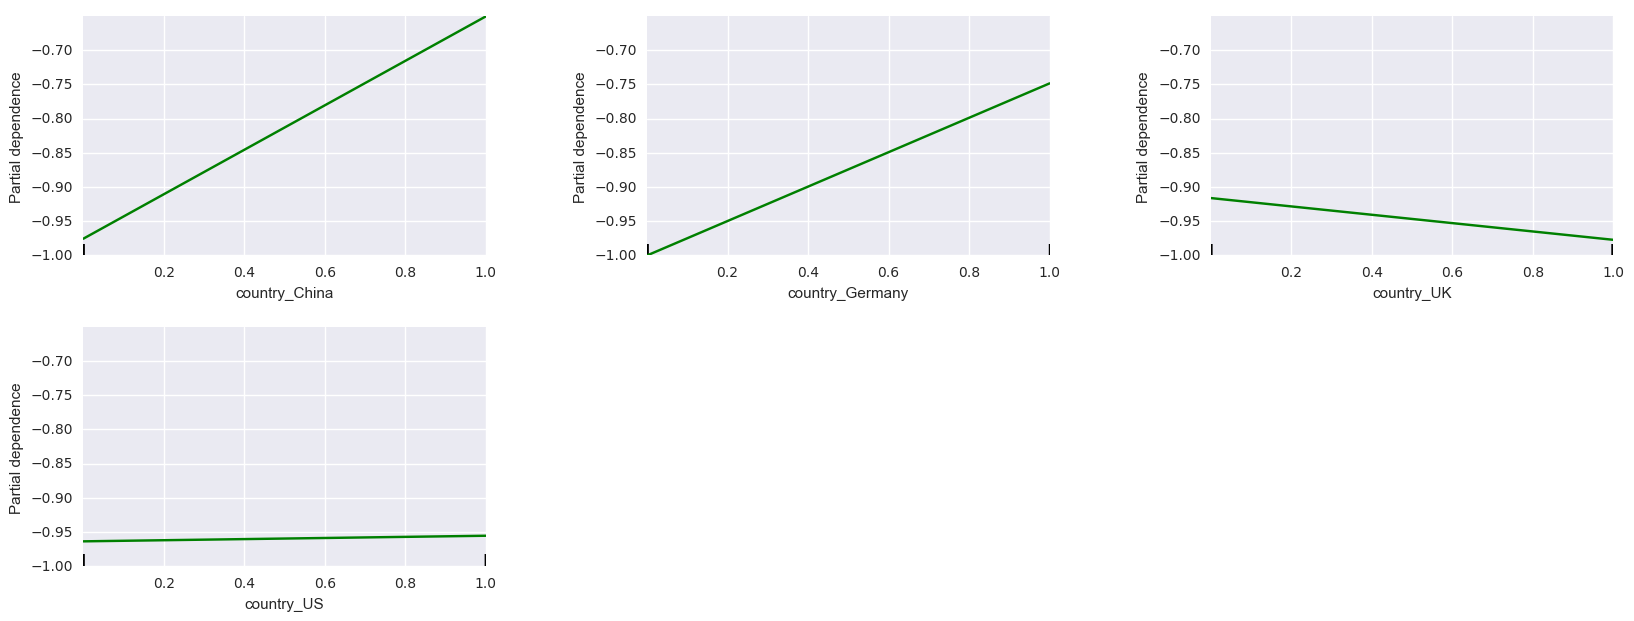

In [133]:
fig, axs = plot_partial_dependence(model_gb, Xtrain, [3,4,5,6],df.columns,n_jobs=3, grid_resolution=100,figsize=(18,10))


analysis

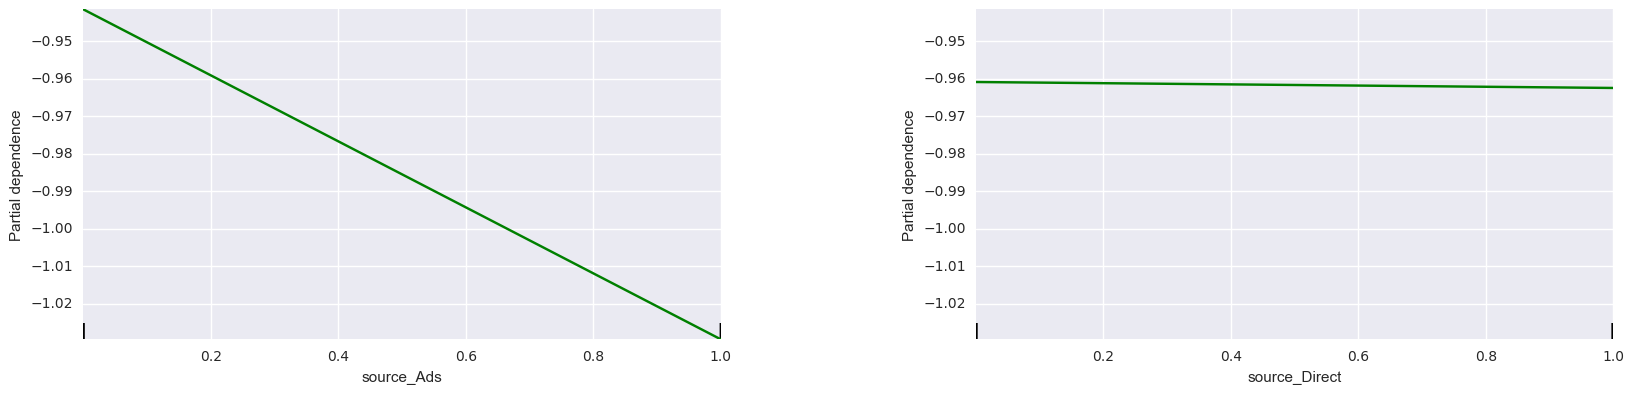

In [135]:
fig, axs = plot_partial_dependence(model_gb, Xtrain, [7,8],df.columns,n_jobs=3, grid_resolution=100,figsize=(18,6)) 